# PolynomialFeatures

In [1]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

In [2]:
data = {"X": [0,1,2,3,4,5,6,7,8,9], "y": [2,6,7,7,4,3,2,2,3,11]}
df = pd.DataFrame(data=data)
df

,X,y
0,0,2
1,1,6
2,2,7
3,3,7
4,4,4
5,5,3
6,6,2
7,7,2
8,8,3
9,9,11


In [3]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(df['X'].values, df['y'].values, test_size=0.2)

In [4]:
X_train

array([5, 8, 6, 2, 4, 0, 7, 1], dtype=int64)

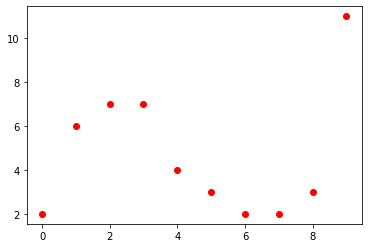

In [5]:
plt.scatter(df['X'], df['y'], color='red')

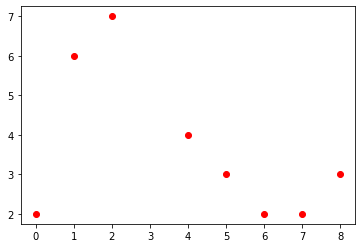

In [6]:
plt.scatter(X_train, y_train, color='red')

### Simple example:

[[  1.   5.  25. 125.]
 [  1.   8.  64. 512.]
 [  1.   6.  36. 216.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]
 [  1.   0.   0.   0.]
 [  1.   7.  49. 343.]
 [  1.   1.   1.   1.]]
(8, 4)
y_pred (8,)
Score: 0.9577789199697487


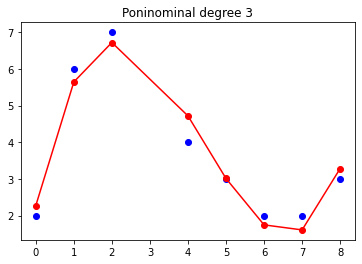

In [7]:
degree = 3

# Paso nº 1 - Llamamos a fit_transform 
# Calculamos las pendientes de nuestras Xn
polinominal_model = PolynomialFeatures(degree) 
# para cada variable tendrá tantos coeficientes como grados, es un paso necesario antes de entrenar el modelo de regresión con el fit
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print(X_poly)
print(X_poly.shape)

# Paso nº2
# Llamar a la regresión lineal entrenándola con la salida del fit_transform
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train) # a partir del fit_transform, el X_poly corresponde al y_train
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train))) # ordenación 'sorted' de los elementos 

plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

### **To predict**

In [8]:
X_test

array([9, 3], dtype=int64)

In [9]:
 # para esta segunda polinomización, no hace falta pasar un y_train, ya que la instancia de polinomial_model ya está entrenado
X_test_poly = polinominal_model.fit_transform(X_test.reshape(-1, 1)) 

y_test_pred = lin_reg_model.predict(X_test_poly)

print("X_test\n", X_test)
print("X_test_poly\n", X_test_poly)
print("y_test_pred\n", y_test_pred)

X_test
 [9 3]
X_test_poly
 [[  1.   9.  81. 729.]
 [  1.   3.   9.  27.]]
y_test_pred
 [7.45548545 6.1829653 ]


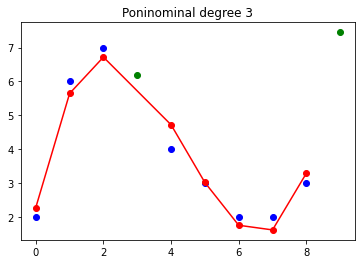

In [10]:
plt.scatter(X_train_to_show, y_train_to_show, color='b')
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))

plt.scatter(X_test, y_test_pred, color='green', label="X_test")

plt.show()

In [11]:
print("Score test:", r2_score(y_test, y_test_pred))

Score test: -0.6538911336221644


In [12]:
y_test

array([11,  7], dtype=int64)

In [13]:
y_test_pred

array([7.45548545, 6.1829653 ])

In [14]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

2.180774623203714

### Nice example

################
[[ 1.  7. 49.]
 [ 1.  3.  9.]
 [ 1.  8. 64.]
 [ 1.  6. 36.]
 [ 1.  9. 81.]
 [ 1.  1.  1.]
 [ 1.  0.  0.]
 [ 1.  2.  4.]]
(8, 3)
y_pred (8,)
Score: 0.07325445107997985
MAE: 2.8414634146341453


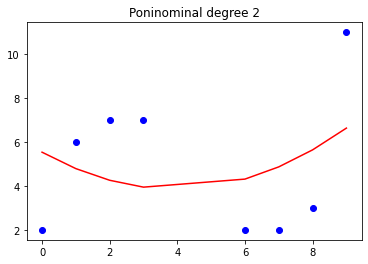

################
[[  1.   7.  49. 343.]
 [  1.   3.   9.  27.]
 [  1.   8.  64. 512.]
 [  1.   6.  36. 216.]
 [  1.   9.  81. 729.]
 [  1.   1.   1.   1.]
 [  1.   0.   0.   0.]
 [  1.   2.   4.   8.]]
(8, 4)
y_pred (8,)
Score: 0.9625480438115127
MAE: 0.47208737864075356


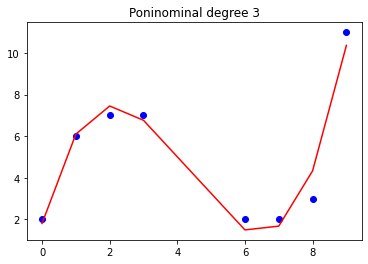

################
[[1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]]
(8, 5)
y_pred (8,)
Score: 0.9826024246000928
MAE: 0.3398058252428662


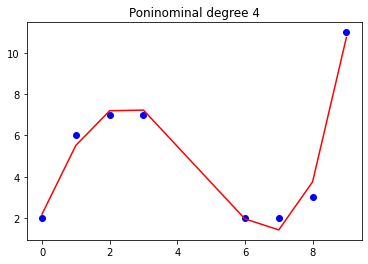

################
[[1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]]
(8, 6)
y_pred (8,)
Score: 0.993041438293282
MAE: 0.19474345150607386


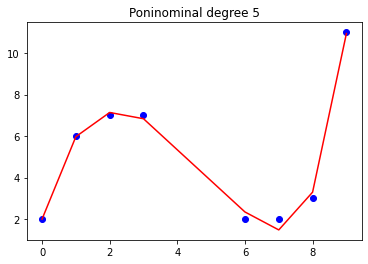

################
[[1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03 1.68070e+04
  1.17649e+05]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02
  7.29000e+02]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03 3.27680e+04
  2.62144e+05]
 [1.00000e+00 6.00000e+00 3.60000e+01 2.16000e+02 1.29600e+03 7.77600e+03
  4.66560e+04]
 [1.00000e+00 9.00000e+00 8.10000e+01 7.29000e+02 6.56100e+03 5.90490e+04
  5.31441e+05]
 [1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
  6.40000e+01]]
(8, 7)
y_pred (8,)
Score: 0.9947261879394844
MAE: 0.19433198379916294


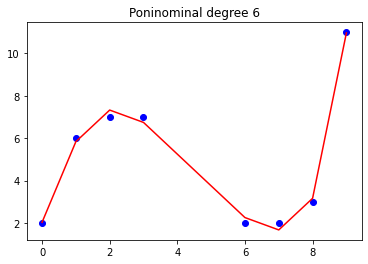

################
[[1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04 1.176490e+05 8.235430e+05]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02 7.290000e+02 2.187000e+03]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04 2.621440e+05 2.097152e+06]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03 4.665600e+04 2.799360e+05]
 [1.000000e+00 9.000000e+00 8.100000e+01 7.290000e+02 6.561000e+03
  5.904900e+04 5.314410e+05 4.782969e+06]
 [1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01 6.400000e+01 1.280000e+02]]
(8, 8)
y_pred (8,)
Score: 1.0
MAE: 1.7178309885679255e-09


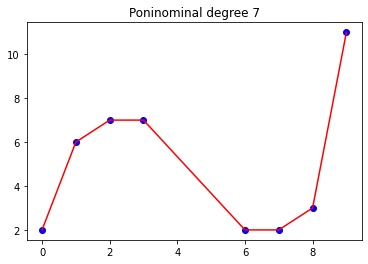

################
[[1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03
  1.6807000e+04 1.1764900e+05 8.2354300e+05 5.7648010e+06]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01 8.1000000e+01
  2.4300000e+02 7.2900000e+02 2.1870000e+03 6.5610000e+03]
 [1.0000000e+00 8.0000000e+00 6.4000000e+01 5.1200000e+02 4.0960000e+03
  3.2768000e+04 2.6214400e+05 2.0971520e+06 1.6777216e+07]
 [1.0000000e+00 6.0000000e+00 3.6000000e+01 2.1600000e+02 1.2960000e+03
  7.7760000e+03 4.6656000e+04 2.7993600e+05 1.6796160e+06]
 [1.0000000e+00 9.0000000e+00 8.1000000e+01 7.2900000e+02 6.5610000e+03
  5.9049000e+04 5.3144100e+05 4.7829690e+06 4.3046721e+07]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.600000

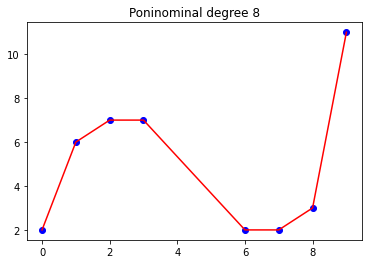

In [15]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

MUCHO OJO CON SOBREENTRENAR EL MODELO YA QUE ENCAJARÍA BIEN PERO SÓLO PARA LOS DATOS PROPORCIONADOS

### Another nice example

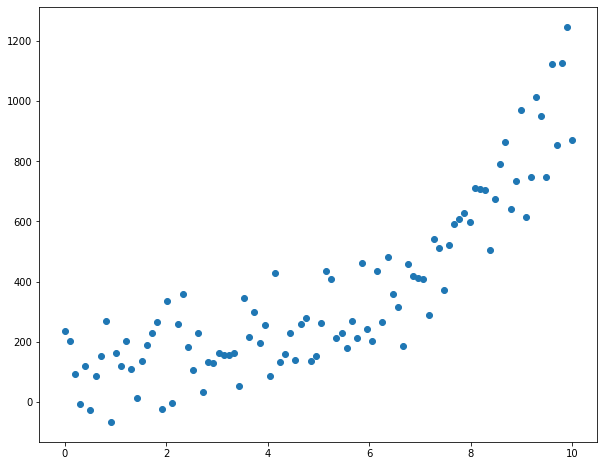

In [17]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [18]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################
(80, 3)
y_pred (80,)
Score: 0.8620170432941103


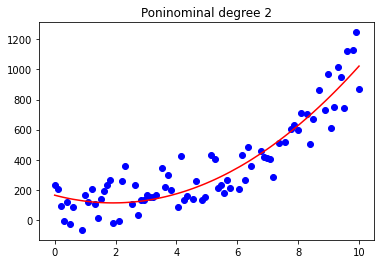

################
(80, 4)
y_pred (80,)
Score: 0.8742291109730561


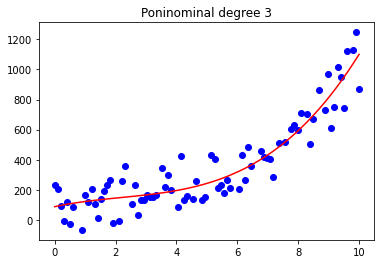

################
(80, 5)
y_pred (80,)
Score: 0.8743162803659216


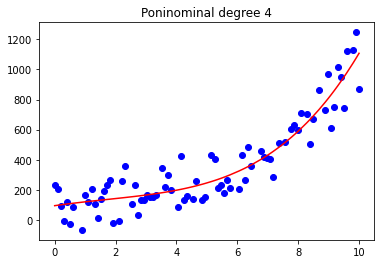

KeyboardInterrupt: Interrupted by user

In [19]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

## 2. Another

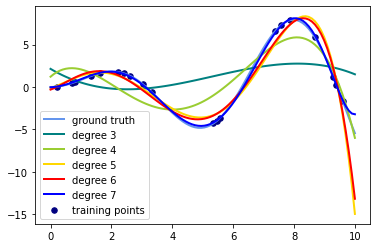

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold', 'red', 'blue']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5, 6, 7]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()